In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.signal import savgol_filter

# Define figure style 

In [10]:
# -------------------------------

# Figure style function 
def figstyle(ax, title, x, y, leg):
    # Tick formatting 
    ax.set_yticks(ax.get_yticks())
    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(16) 
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(16) 
    
    # Legend 
    if leg == True: 
        ax.legend(loc='upper left',fontsize=14)
        
    # Labels and title 
    ax.set_title(title,size=26,pad=10)
    ax.set_xlabel(x,size=20)
    ax.set_ylabel(y,size=20)
    
# -------------------------------

# Growth curves

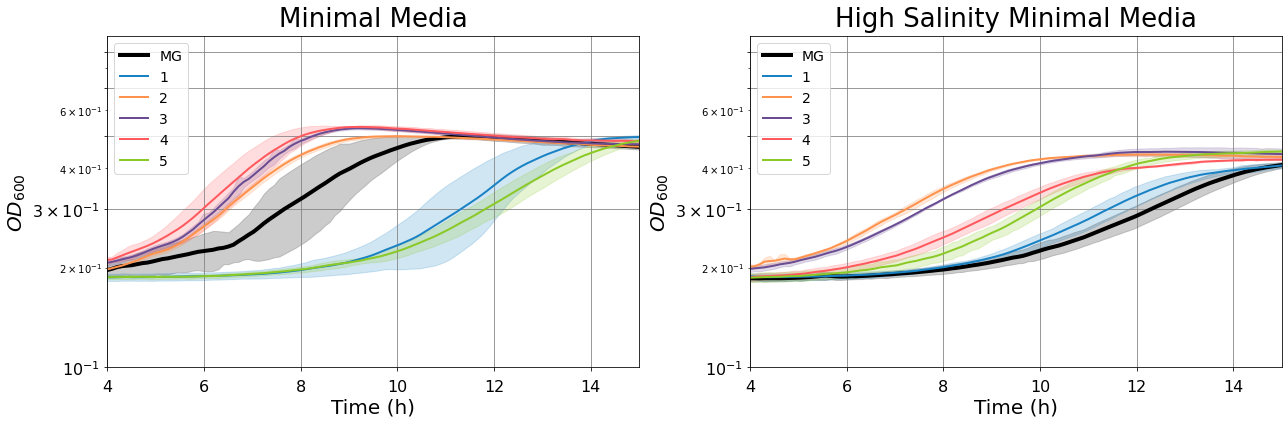

In [3]:
# Load growth and metadata
growth_df = (
    pd.read_csv('./MGvALE_OD.csv', index_col=0)
      .rename_axis('pos')
)

growth_df_pos = pd.read_csv('./MGvALE_pos.csv')

# Figure setup
fig, axes = plt.subplots(1, 2)
fig.set_figheight(6)
fig.set_figwidth(18)
fig.patch.set_facecolor('white')

# Color palette (MG + 5 ALE strains)
custom_palette = sns.color_palette([
    '#ffca3a', '#1982c4', '#ff924c',
    '#6a4c93', '#ff595e', '#8ac926'
])

# Axis ticks
custom_xticks = growth_df.index.values.astype(float)
custom_yticks = np.arange(0.1, 1, 0.2).tolist()

# Plot growth in HM9
ax = axes[0]

# MG strain
hm9_MG = growth_df[
    growth_df_pos.loc[
        (growth_df_pos['condition'] == 'HM9') &
        (growth_df_pos['strain'] == 'MG'),
        'positions'
    ]
]

ax.semilogy(
    custom_xticks,
    savgol_filter(hm9_MG.mean(axis=1), 5, 3),
    label='MG',
    c='black',
    linewidth=4
)

# MG variability
std_dev = hm9_MG.std(axis=1)
ax.fill_between(
    x=custom_xticks,
    y1=hm9_MG.mean(axis=1) + std_dev,
    y2=hm9_MG.mean(axis=1) - std_dev,
    alpha=0.4,
    color='grey'
)

# ALE strains
for i in range(1, 6):
    ALE = growth_df[
        growth_df_pos.loc[
            (growth_df_pos['condition'] == 'HM9') &
            (growth_df_pos['strain'] == f'ALE{i}'),
            'positions'
        ]
    ]

    ax.semilogy(
        custom_xticks,
        savgol_filter(ALE.mean(axis=1), 5, 3),
        label=str(i),
        c=custom_palette[i],
        linewidth=2
    )

    std_dev = ALE.std(axis=1)
    ax.fill_between(
        x=custom_xticks,
        y1=ALE.mean(axis=1) + std_dev,
        y2=ALE.mean(axis=1) - std_dev,
        alpha=0.2,
        color=custom_palette[i]
    )

figstyle(ax, 'Minimal Media', 'Time (h)', '$OD_{600}$', True)
ax.set_ylim(0.1, 1)
ax.set_xlim(4, 15)
ax.set_yticks(custom_yticks)
ax.tick_params(axis='x', pad=8)
ax.grid(visible=True, axis='both', color='grey')

# Plot growth in HM9 + 50% seawater
ax = axes[1]

# MG strain
hm9_sea_MG = growth_df[
    growth_df_pos.loc[
        (growth_df_pos['condition'] == 'HM9+50%sea') &
        (growth_df_pos['strain'] == 'MG'),
        'positions'
    ]
]

ax.semilogy(
    custom_xticks,
    savgol_filter(hm9_sea_MG.mean(axis=1), 5, 3),
    label='MG',
    c='black',
    linewidth=4
)

# MG variability
std_dev = hm9_sea_MG.std(axis=1)
ax.fill_between(
    x=custom_xticks,
    y1=hm9_sea_MG.mean(axis=1) + std_dev,
    y2=hm9_sea_MG.mean(axis=1) - std_dev,
    alpha=0.4,
    color='grey'
)

# ALE strains
for i in range(1, 6):
    ALE = growth_df[
        growth_df_pos.loc[
            (growth_df_pos['condition'] == 'HM9+50%sea') &
            (growth_df_pos['strain'] == f'ALE{i}'),
            'positions'
        ]
    ]

    ax.semilogy(
        custom_xticks,
        savgol_filter(ALE.mean(axis=1), 5, 3),
        label=str(i),
        c=custom_palette[i],
        linewidth=2
    )

    std_dev = ALE.std(axis=1)
    ax.fill_between(
        x=custom_xticks,
        y1=ALE.mean(axis=1) + std_dev,
        y2=ALE.mean(axis=1) - std_dev,
        alpha=0.2,
        color=custom_palette[i]
    )

figstyle(ax, 'High Salinity Minimal Media', 'Time (h)', '$OD_{600}$', True)
ax.set_ylim(0.1, 1)
ax.set_xlim(4, 15)
ax.set_yticks(custom_yticks)
ax.tick_params(axis='x', pad=8)
ax.grid(visible=True, axis='both', color='grey')

# Final layout
plt.tight_layout()


# Lag phase

In [4]:
# Read in lag values and make a copy of metadata from above  
lag_df = pd.read_csv('lag.csv', index_col=0) 
lag_new = growth_df_pos.copy()

# Add lag to the metadata  
for i in lag_new.index:
    lag_new.loc[i,'lag'] = lag_df.loc[lag_new.loc[i].positions].lag
lag_adj = lag_new.loc[(lag_new['strain'] != '0')]

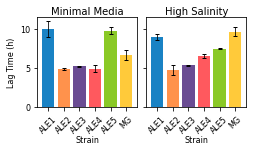

In [5]:
# Bar plot of lag phase by strain and condition
fig, axes = plt.subplots(
    1, 2,
    sharey=True,
    constrained_layout=True
)

fig.set_figheight(2)
fig.set_figwidth(3.4)
fig.patch.set_facecolor('white')

# Color palette for strains
palette_dict = {
    'MG':   '#ffca3a',
    'ALE1': '#1982c4',
    'ALE2': '#ff924c',
    'ALE3': '#6a4c93',
    'ALE4': '#ff595e',
    'ALE5': '#8ac926',
}

# Plot lag phase in HM9
ax = axes[0]

# Aggregate lag statistics by strain
hm9_data = (
    lag_adj[lag_adj['condition'] == 'HM9']
    .groupby('strain', as_index=False)
    .agg(
        lag=('lag', 'mean'),
        lag_std=('lag', 'std')
    )
)

# Bar colors and positions
colors_hm9 = [palette_dict[strain] for strain in hm9_data['strain']]
x_pos = np.arange(len(hm9_data))

# Draw bars
ax.bar(hm9_data['strain'], hm9_data['lag'], color=colors_hm9)

# Add error bars (±1 std)
ax.errorbar(
    x=x_pos,
    y=hm9_data['lag'].values,
    yerr=hm9_data['lag_std'],
    fmt='none',
    ecolor='black',
    capsize=2,
    elinewidth=0.8
)

# Axis styling
ax.set_title('Minimal Media', size=10, pad=1)
ax.set_xlabel('Strain', size=8, labelpad=1)
ax.set_ylabel('Lag Time (h)', size=8)

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(8)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(8)
    tick.label.set_rotation(45)

# Plot lag phase in HM9 + 50% seawater
ax = axes[1]

# Aggregate lag statistics by strain
hm9sw_data = (
    lag_adj[lag_adj['condition'] == 'HM9+50%sea']
    .groupby('strain', as_index=False)
    .agg(
        lag=('lag', 'mean'),
        lag_std=('lag', 'std')
    )
)

# Bar colors and positions
colors_hm9sw = [palette_dict[strain] for strain in hm9sw_data['strain']]
x_pos = np.arange(len(hm9sw_data))

# Draw bars
ax.bar(hm9sw_data['strain'], hm9sw_data['lag'], color=colors_hm9sw)

# Add error bars (±1 std)
ax.errorbar(
    x=x_pos,
    y=hm9sw_data['lag'].values,
    yerr=hm9sw_data['lag_std'],
    fmt='none',
    ecolor='black',
    capsize=2,
    elinewidth=0.8
)

# Axis styling
ax.set_title('High Salinity', size=10, pad=1)
ax.set_xlabel('Strain', size=8, labelpad=1)

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(8)
    tick.label.set_rotation(45)


# Doubling Time

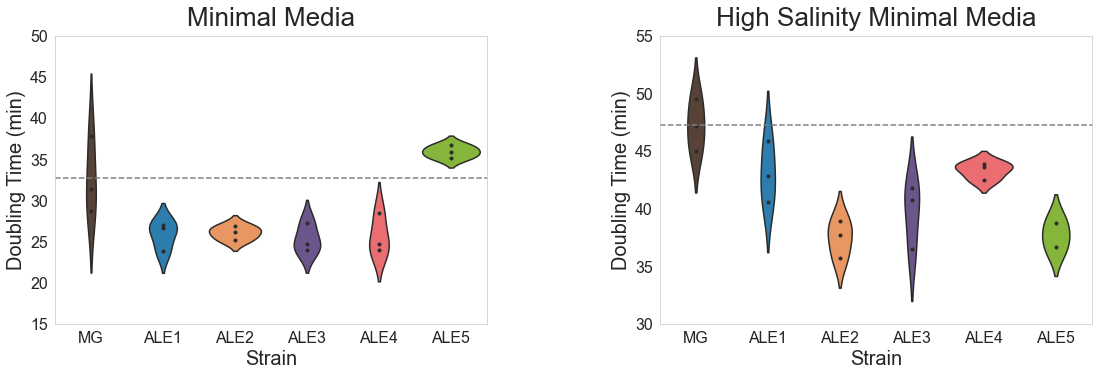

In [7]:
# Load growth statistics
growth_df_stats = pd.read_csv('./growth_stats.csv')

# Extract HM9 doubling-time statistics
hm9_stats = growth_df_stats.loc[growth_df_stats['condition'] == 'HM9'].copy()

# Mean MG doubling time (reference)
hm9_mean = hm9_stats.loc[hm9_stats['strain'] == 'MG', 'dt'].mean()

# Column used for plotting (kept identical to original)
hm9_stats['dt_%ch'] = hm9_stats['dt']

# Extract HM9 + 50% seawater doubling-time statistics
hm9sea_stats = growth_df_stats.loc[
    growth_df_stats['condition'] == 'HM9+50%sea'
].copy()

# Mean MG doubling time (reference)
hm9sea_mean = hm9sea_stats.loc[
    hm9sea_stats['strain'] == 'MG',
    'dt'
].mean()

# Column used for plotting (kept identical to original)
hm9sea_stats['dt_%ch'] = hm9sea_stats['dt']

# Plot HM9 vs HM9 + 50% seawater doubling times
fig, axes = plt.subplots(1, 2)
fig.set_figheight(5)
fig.set_figwidth(18)
fig.patch.set_facecolor('white')

plt.subplots_adjust(
    left=0.1,
    right=0.9,
    bottom=0.1,
    top=0.9,
    wspace=0.4,
    hspace=0.4
)

# Color palette (MG + ALE strains)
custom_palette = sns.color_palette([
    '#5C4033', '#1982c4', '#ff924c',
    '#6a4c93', '#ff595e', '#8ac926'
])

# Seaborn styling
sns.set_style("whitegrid", {"grid.color": "0.9"})

# HM9 violin plot
sns.violinplot(
    x='strain',
    y='dt_%ch',
    data=hm9_stats,
    palette=custom_palette,
    ax=axes[0],
    inner='points'
)

# Reference line (MG mean)
axes[0].axhline(y=hm9_mean, linestyle='--', color='gray')

figstyle(
    axes[0],
    'Minimal Media',
    'Strain',
    'Doubling Time (min)',
    False
)

axes[0].grid(visible=False, axis='both')

# HM9 + 50% seawater violin plot
sns.violinplot(
    x='strain',
    y='dt_%ch',
    data=hm9sea_stats,
    palette=custom_palette,
    ax=axes[1],
    inner='points'
)

# Reference line (MG mean)
axes[1].axhline(y=hm9sea_mean, linestyle='--', color='gray')

figstyle(
    axes[1],
    'High Salinity Minimal Media',
    'Strain',
    'Doubling Time (min)',
    False
)

axes[1].grid(visible=False, axis='both')


# NaCl control 

In [23]:
# OD  
nacl_df = pd.read_csv('./MGvALE_NaCl_OD.csv',index_col=0).rename_axis('pos')
nacl_df.columns = nacl_df.iloc[0]
nacl_df = nacl_df.drop('Time [s]')
nacl_df = nacl_df.transpose().rename_axis('time')

# Metadata containing position and condition
nacl_df_pos = pd.read_csv('./MGvALE_NaCl_positions.csv')
nacl_df_pos['positions'] = nacl_df_pos['row']+ nacl_df_pos['col'].astype(str)

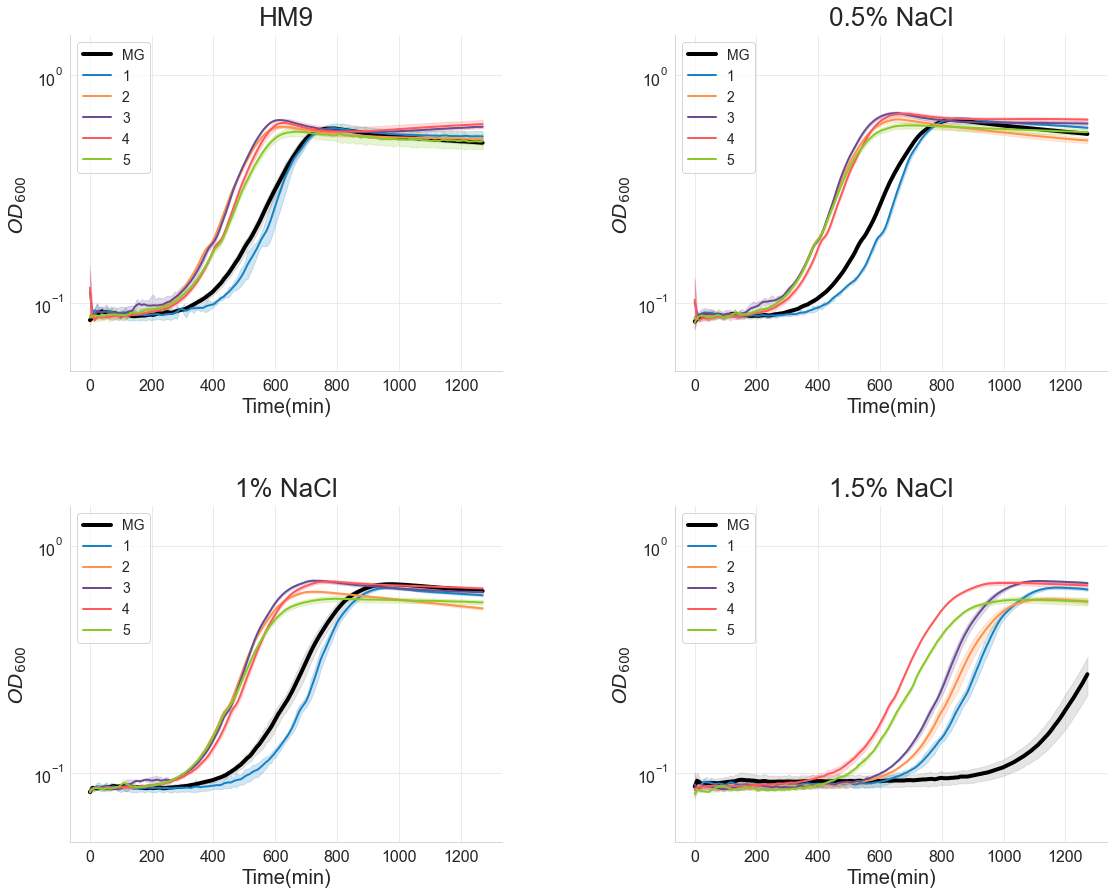

In [26]:
# Figure + styling setup 
fig, axes = plt.subplots(2, 2)
fig.set_figheight(14)
fig.set_figwidth(18)

plt.subplots_adjust(
    left=0.1, right=0.9, bottom=0.1, top=0.9,
    wspace=0.4, hspace=0.4
)

custom_palette = sns.color_palette(
    ['#1982c4', '#ff924c', '#6a4c93', '#ff595e', '#8ac926']
)

custom_xticks = nacl_df.index.values.astype(float) / 60
custom_yticks = [0.1, 1]

# Helper functions 
def _subset_positions(condition: str, strain: str):
    pos = nacl_df_pos.loc[
        (nacl_df_pos['condition'] == condition) & (nacl_df_pos['strain'] == strain),
        'positions'
    ]
    return nacl_df[pos]

def _plot_mean_with_std(ax, data, label, line_color, line_width, fill_color):
    mean = data.mean(axis=1)
    std = data.std(axis=1)

    ax.semilogy(
        custom_xticks,
        savgol_filter(mean, 5, 3),
        label=label,
        c=line_color,
        linewidth=line_width
    )

    ax.fill_between(
        x=custom_xticks,
        y1=mean + std,
        y2=mean - std,
        alpha=0.2,
        color=fill_color
    )

def plot_condition(ax, condition_key: str, panel_title: str):
    # MG trace (black, thicker)
    mg = _subset_positions(condition_key, 'MG')
    _plot_mean_with_std(ax, mg, label='MG', line_color='black', line_width=4, fill_color='grey')

    # ALE1–ALE5 traces (no skipping needed)
    for i in range(1, 6):
        ale = _subset_positions(condition_key, f'ALE{i}')
        _plot_mean_with_std(
            ax,
            ale,
            label=str(i),
            line_color=custom_palette[i - 1],
            line_width=2,
            fill_color=custom_palette[i - 1]
        )

    figstyle(ax, panel_title, 'Time(min)', '$OD_{600}$', True)
    ax.set_ylim(0.05, 1.5)
    ax.set_yticks(custom_yticks)

# Panels 
plot_condition(axes[0, 0], 'HM9', 'HM9')
plot_condition(axes[0, 1], '86mM_NaCl', '0.5% NaCl')
plot_condition(axes[1, 0], '134mM_NaCl', '1% NaCl')
plot_condition(axes[1, 1], '233mM_NaCl', '1.5% NaCl')

# Final styling
sns.despine()
sns.set_style("whitegrid", {"grid.color": "0.9"})
